In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import os

**Importing Dataset**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/My Uber Drives.csv")

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
print(df.shape)
df.dtypes

(1156, 7)


START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

**Checking for Null Values and Dropping Whichever Necessary**


In [4]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [5]:
df[df['STOP*'].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
df.dropna(subset=['END_DATE*'],inplace=True)

In [ ]:
print(df.shape)

(1155, 7)


In [7]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


**Dropping Purpose column since more than 50% of data  is missing**

In [8]:
df.drop(['PURPOSE*'],axis=1,inplace=True)

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7


**Checking and Dropping Duplicate Row**

In [9]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


In [10]:
df.drop(index=492,axis=0,inplace=True)

In [11]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*


**Changing the data types of start and end time to DateTime format**

In [12]:
df['START_DATE*']=pd.to_datetime(df['START_DATE*'],format='%m/%d/%Y %H:%M')
df['END_DATE*']=pd.to_datetime(df['END_DATE*'],format='%m/%d/%Y %H:%M')

In [ ]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
dtype: object

**1. Category**

In [13]:
df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

In [14]:
df.groupby(['CATEGORY*']).agg(total_miles=('MILES*','sum'))

,total_miles
CATEGORY*,
Business,11477.1
Personal,717.7


Text(0.5, 1.0, 'Total miles travelled per category')

<Figure size 640x480 with 0 Axes>

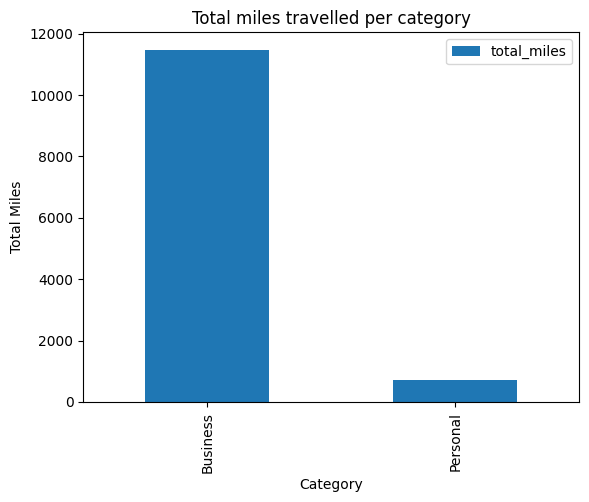

In [ ]:
plt.figure()
df.groupby(['CATEGORY*']).agg(total_miles=('MILES*','sum')).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Miles')
plt.title('Total miles travelled per category')

In [ ]:
len(df['START*'].unique())

177

In [ ]:
df['START*'].value_counts(ascending=False)[:10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START*, dtype: int64

<Axes: title={'center': 'Top 10 pickup locations'}, ylabel='Pickup Count'>

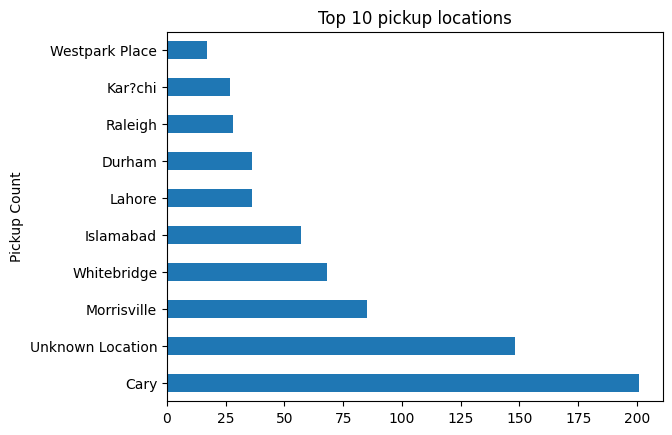

In [ ]:
df['START*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Pickup Count',title='Top 10 pickup locations')

In [ ]:
len(df['STOP*'].unique())

188

In [ ]:
df['STOP*'].value_counts(ascending=False)[:10]

Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP*, dtype: int64

<Axes: title={'center': 'Top 10 Drop locations'}, ylabel='Pickup Count'>

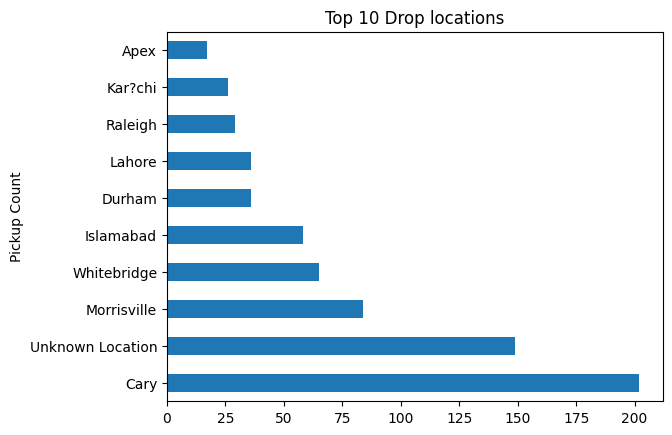

In [ ]:
df['STOP*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Pickup Count',title='Top 10 Drop locations')

**2.Miles**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,1154.0,10.567418,21.588452,0.5,2.9,6.0,10.4,310.3


**3.Round trips**

<Axes: xlabel='ROUND_TRIP*', ylabel='count'>

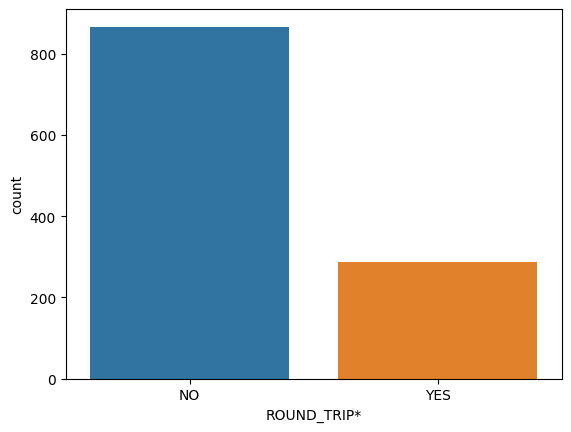

In [ ]:
def is_round(df):
  if df['START*']==df['STOP*']:
    return "YES"
  else:
    return "NO"

df['ROUND_TRIP*']=df.apply(is_round,axis=1)
sns.countplot(x='ROUND_TRIP*',data=df,order=df['ROUND_TRIP*'].value_counts().index)

In [ ]:
df['ROUND_TRIP*'].value_counts()

NO     866
YES    288
Name: ROUND_TRIP*, dtype: int64

25% rides are round trips

In [17]:
df['TRAVEL_TIME_HOURS']=(df['END_DATE*']-df['START_DATE*']).dt.total_seconds()/60/60

In [18]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,TRAVEL_TIME,TRAVEL_TIME_HOURS
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,0.100000,0.100000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,0.200000,0.200000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,0.216667,0.216667
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,0.233333,0.233333
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,1.116667,1.116667


In [23]:
df.drop(['TRAVEL_TIME'],axis=1,inplace=True)

In [21]:
df['TRAVEL_TIME_MINUTES']=(df['END_DATE*']-df['START_DATE*']).dt.total_seconds()/60

In [24]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,TRAVEL_TIME_HOURS,TRAVEL_TIME_MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,0.100000,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,0.200000,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,0.216667,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,0.233333,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,1.116667,67.0


In [25]:
print(df['TRAVEL_TIME_MINUTES'].mean())

23.241767764298093
